In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
# Load the data
data_path = '/Users/mjs/Downloads/archive (1)/yield_df.csv'
df = pd.read_csv(data_path)

In [12]:
# Data Exploration
print(df.head())

# Checking missing values
print("\nMissing values:\n", df.isnull().sum())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

Missing values:
 Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_

In [26]:
# Normalization to ignore crop popularity bias
df['normalized_yield'] = df.groupby('Item')['hg/ha_yield'].transform(lambda x: (x - x.mean()) / x.std())

# Feature selection
X = df[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['normalized_yield']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model Training & Validation
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.04919287372833312
R^2 Score: 0.9506277927640057


/Users/mjs/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


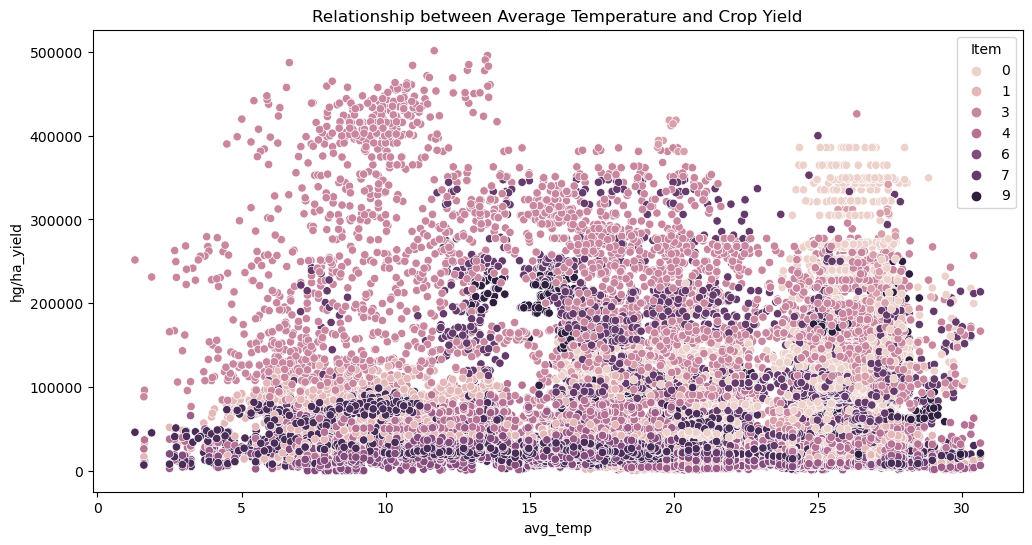

In [28]:
# Visualization of Relationships
# Plotting relationship between avg_temp and hg/ha_yield
plt.figure(figsize=(12, 6))
sns.scatterplot(df['avg_temp'], df['hg/ha_yield'], hue=df['Item'])
plt.title('Relationship between Average Temperature and Crop Yield')
plt.show()

/Users/mjs/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


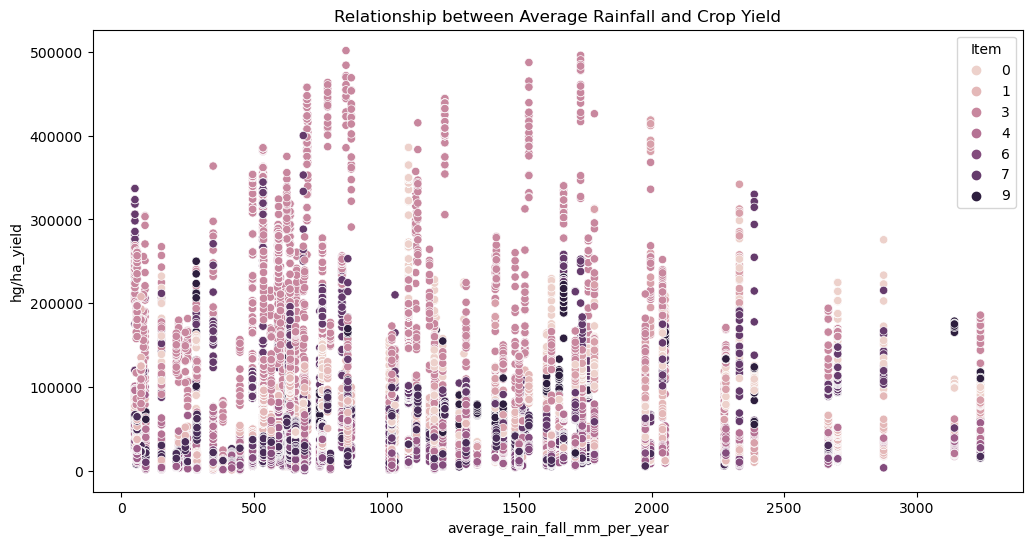

In [29]:
# Plotting relationship between average_rain_fall_mm_per_year and hg/ha_yield
plt.figure(figsize=(12, 6))
sns.scatterplot(df['average_rain_fall_mm_per_year'], df['hg/ha_yield'], hue=df['Item'])
plt.title('Relationship between Average Rainfall and Crop Yield')
plt.show()

/Users/mjs/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


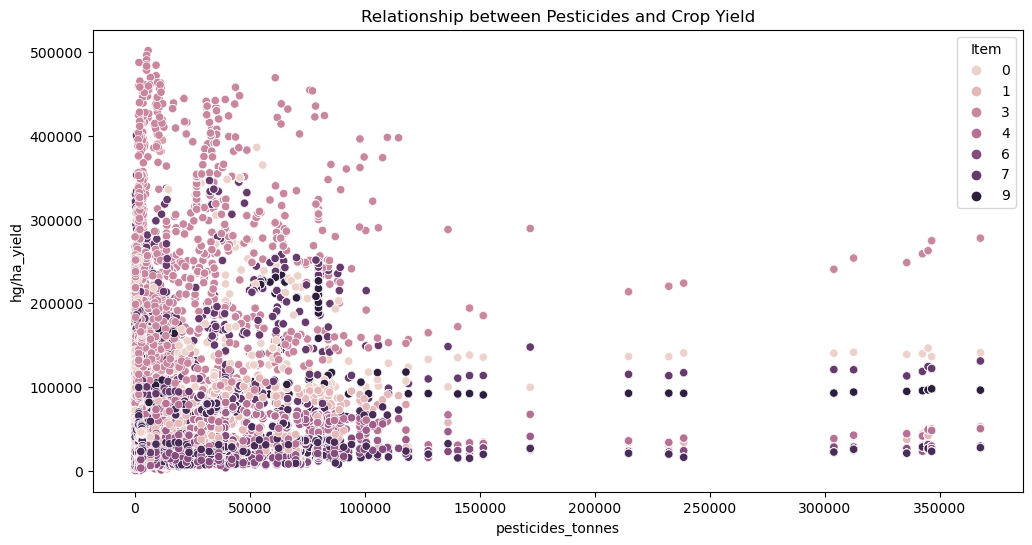

In [30]:
# Plotting relationship between pesticides_tonnes and hg/ha_yield
plt.figure(figsize=(12, 6))
sns.scatterplot(df['pesticides_tonnes'], df['hg/ha_yield'], hue=df['Item'])
plt.title('Relationship between Pesticides and Crop Yield')
plt.show()

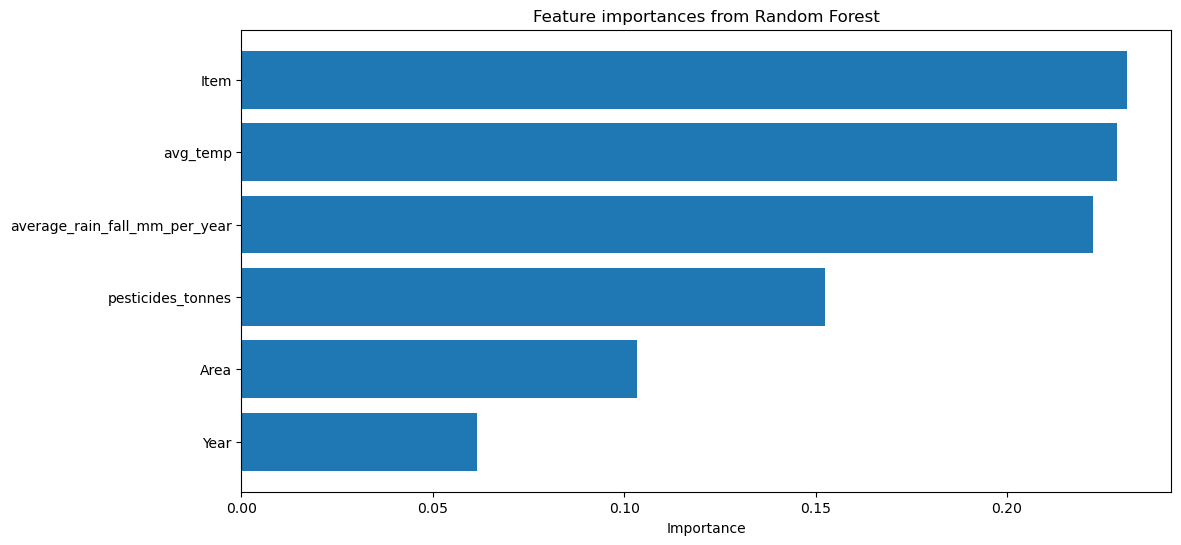

In [31]:
# Feature Importance from Random Forest
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances from Random Forest')
plt.show()